## Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Load dataset

In [2]:
df = pd.read_csv("og.csv")

## Convert date columns to datetime format with correct format

In [3]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')

## Drop rows with invalid or missing dates


In [4]:
df.dropna(subset=['Order Date'], inplace=True)

## Handle missing values

In [5]:
df['Postal Code'].fillna(df['Postal Code'].mode()[0], inplace=True)

## Drop unnecessary columns

In [6]:
df.drop(columns=['Row ID', 'Customer Name'], inplace=True)

## Set Order Date as index and sort

In [7]:
df.set_index('Order Date', inplace=True)
df.sort_index(inplace=True)

## Handle duplicates

In [8]:
df.drop_duplicates(inplace=True)


## Resample sales data to monthly frequency

In [9]:
df_monthly_sales = df['Sales'].resample('M').sum()

## Normalize Sales using Min-Max Scaling

In [10]:
scaler = MinMaxScaler()
df['Sales_Normalized'] = scaler.fit_transform(df[['Sales']])

## Save cleaned data

In [13]:
df.to_csv('cleaned_sales_data.csv')
print("Data loading, cleaning, and preprocessing completed.")

Data loading, cleaning, and preprocessing completed.


## Display cleaned data

In [17]:
print(df.describe().head(4))

                           Ship Date   Postal Code        Sales  \
count                           2676   3959.000000  3959.000000   
mean   2017-05-24 14:32:49.506726400  55028.656226   220.349362   
min              2015-02-05 00:00:00   1040.000000     0.556000   
25%              2016-07-12 00:00:00  22204.000000    17.472000   

       Sales_Normalized  
count       3959.000000  
mean           0.012560  
min            0.000000  
25%            0.000967  


## Visualizing sales trends

C:\Users\Harishvar\Desktop\files\projects\mlztm\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harishvar\Desktop\files\projects\mlztm\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harishvar\Desktop\files\projects\mlztm\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Harishvar\Desktop\files\projects\mlztm\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

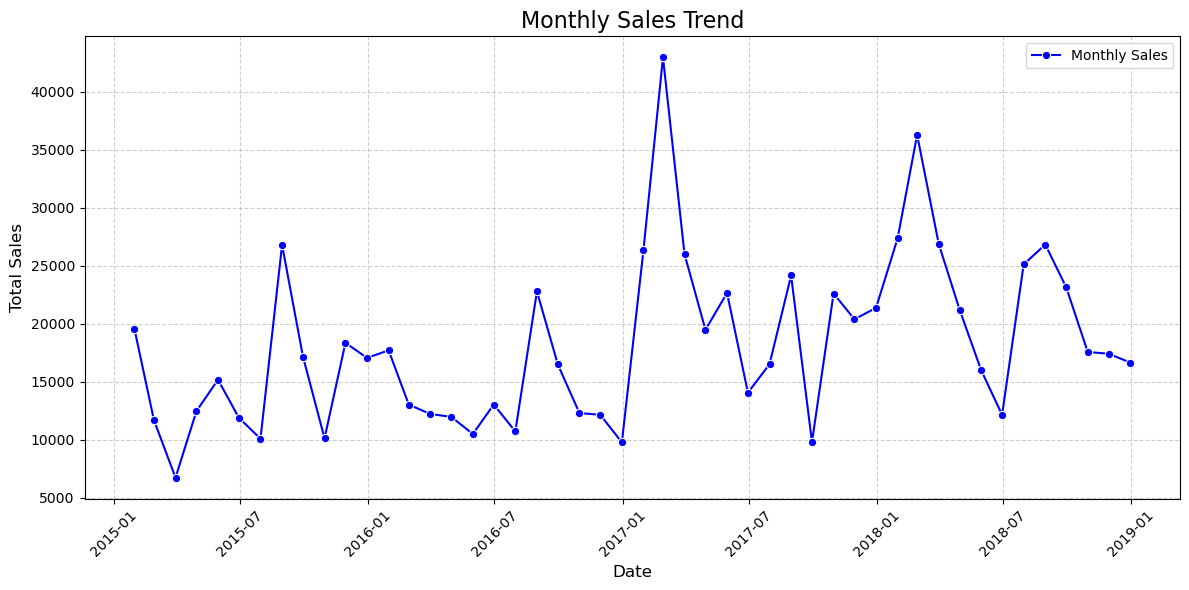

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.values, marker='o', linestyle='-', color='b', label='Monthly Sales')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()